Build a regression model.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy import stats

In [21]:
df_combined2 = pd.read_csv('df_combined2.csv')
df_combined2.shape

(72650, 13)

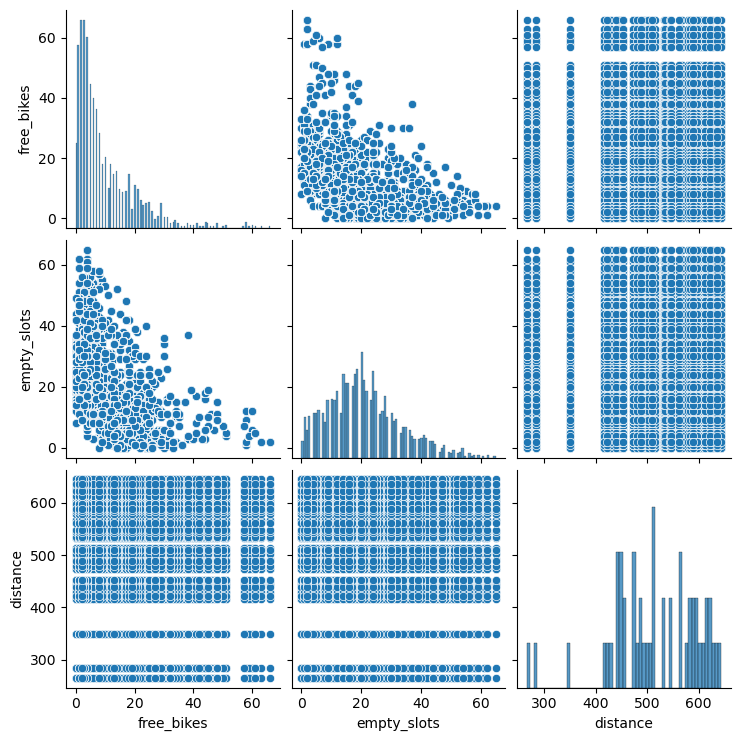

In [42]:
sns.pairplot(data = df_combined2.drop(columns = ['latitude_x', 'longitude_x', 'latitude_y', 'longitude_y']))
plt.show()

In [44]:
df_combined2.drop(columns = ['latitude_x', 'longitude_x', 'latitude_y', 'longitude_y']).corr(numeric_only = True)

,free_bikes,empty_slots,distance
free_bikes,1.000000e+00,-4.619319e-01,-4.803084e-15
empty_slots,-4.619319e-01,1.000000e+00,-7.279477e-16
distance,-4.803084e-15,-7.279477e-16,1.000000e+00


Since correlation is a joint/complementary stat analysis, working on count values of categorical variables is not possible. The correlation analysis revealed that free bikes and empty slots were negatively related (r = -0.46). The relation was significant.

In [25]:
stat, p1 = stats.pearsonr(df_combined2['free_bikes'], df_combined2['empty_slots'])
print(f'free_bikes vs empty_slots: r = {stat}, p = {p1}')

free_bikes vs empty_slots: r = -0.4619319084981957, p = 0.0


In [ ]:
# Group by station and category_type, then count
poi_counts = df_combined2.groupby(['name_x', 'category_type']).size().unstack(fill_value=0).reset_index()
poi_counts

category_type,name_x,bakery,bar,other,restaurant
0,11 Novembre 1918 - 8 Mai 1945,1,6,25,18
1,18 juin 1940 - Buzenval,1,6,25,18
2,8 Mai 1945 - 10 Juillet 1940,1,6,25,18
3,Abbeville - Faubourg Poissonnière,1,6,25,18
4,Abbé Carton - Plantes,1,6,25,18
...,...,...,...,...,...
1445,Youri Gagarine - Karl Marx,1,6,25,18
1446,Yves Farges - Route d'Enghien,1,6,25,18
1447,ZAC des Louvresses,1,6,25,18
1448,Édouard Vaillant - Place Jean Jaurès,1,6,25,18


In [38]:
# Get unique station-level metadata
station_info = df_combined2[['name_x', 'free_bikes', 'empty_slots', 'distance']].drop_duplicates()

# Merge with POI counts
df_merged = pd.merge(station_info, poi_counts, on='name_x', how='left')
df_merged.head()

,name_x,free_bikes,empty_slots,distance,bakery,bar,other,restaurant
0,Argenson - Château,10,15,266,1,6,25,18
1,Argenson - Château,10,15,284,1,6,25,18
2,Argenson - Château,10,15,349,1,6,25,18
3,Argenson - Château,10,15,416,1,6,25,18
4,Argenson - Château,10,15,447,1,6,25,18


In [39]:
df_merged.fillna(0, inplace=True) 
print(df_merged.columns)

Index(['name_x', 'free_bikes', 'empty_slots', 'distance', 'bakery', 'bar',
       'other', 'restaurant'],
      dtype='object')


In [40]:
X = df_merged.drop(columns=['name_x', 'free_bikes'])  # predictors
X = sm.add_constant(X)
y = df_merged['free_bikes']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     5918.
Date:                Mon, 28 Jul 2025   Prob (F-statistic):               0.00
Time:                        20:15:32   Log-Likelihood:            -2.3676e+05
No. Observations:               65385   AIC:                         4.735e+05
Df Residuals:                   65381   BIC:                         4.736e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          20.1365      0.596     33.801      

In [46]:
X = df_merged.drop(columns=['name_x', 'distance', 'empty_slots', 'free_bikes'])  # predictors
X = sm.add_constant(X)
y = df_merged['free_bikes']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                      -0.035
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                    -1091.
Date:                Mon, 28 Jul 2025   Prob (F-statistic):               1.00
Time:                        20:32:40   Log-Likelihood:            -2.4573e+05
No. Observations:               65385   AIC:                         4.915e+05
Df Residuals:                   65382   BIC:                         4.915e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7736      0.898     13.111      0.0

Provide model output and an interpretation of the results. 

In [49]:
X = df_merged.drop(columns=['name_x', 'bar', 'restaurant', 'other', 'bakery', 'free_bikes'])  # predictors
X = sm.add_constant(X)
y = df_merged['free_bikes']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     8868.
Date:                Mon, 28 Jul 2025   Prob (F-statistic):               0.00
Time:                        20:44:28   Log-Likelihood:            -2.3677e+05
No. Observations:               65385   AIC:                         4.735e+05
Df Residuals:                   65382   BIC:                         4.736e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          18.0752      0.219     82.553      

The model showed that the category_types and distance least influenced the regression model. The most important predictor (strangely so) was the empty_slots variable. This is surprising because empty_slots should also be a target variable like free_bikes. Therefore, the predictor variables in this model were not adequate to explain the targets.

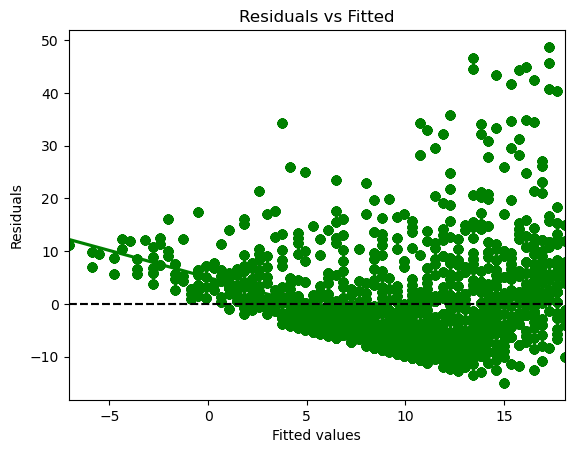

In [72]:
residuals = model.resid
fitted_vals = model.fittedvalues

sns.residplot(x=fitted_vals, y=residuals, lowess=True, color="g")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.axhline(0, color='black', linestyle='--')
plt.show()

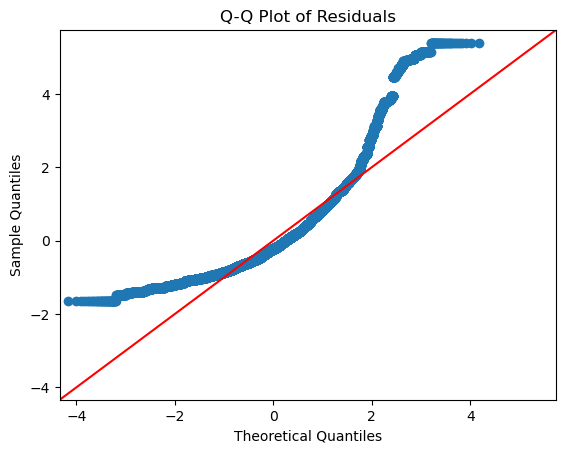

In [73]:
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

The data does not appear normal. from the Q-Q plot. It needs to be log-transformed. 

# Stretch

How can you turn the regression model into a classification model?

In [50]:
def classify_bike_availability(bikes):
    if bikes == 0:
        return 'Empty'
    elif bikes <= 5:
        return 'Low'
    elif bikes <= 10:
        return 'Medium'
    else:
        return 'High'

df_merged['bike_class'] = df_merged['free_bikes'].apply(classify_bike_availability)

In [51]:
X = df_merged.drop(columns=['name_x', 'free_bikes', 'empty_slots', 'bike_class'])
y = df_merged['bike_class']

In [52]:
X = pd.get_dummies(X)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   0    0  508    3]
 [   1    0 4370    4]
 [   2    0 5316   15]
 [   2    0 2855    1]]


c:\Users\Nelson\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nelson\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       Empty       0.00      0.00      0.00       511
        High       0.00      0.00      0.00      4375
         Low       0.41      1.00      0.58      5333
      Medium       0.04      0.00      0.00      2858

    accuracy                           0.41     13077
   macro avg       0.11      0.25      0.14     13077
weighted avg       0.18      0.41      0.24     13077



c:\Users\Nelson\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The model had more bias to predict low bike availability. While the precision of 0.41 may seem tenable, it is actually biased as can be seen in the confusion matrix where 5316 of lows were correctly predicted with only a few lows.

In [56]:
# Convert free_bikes into binary classification target
df_merged['has_many_bikes'] = df_merged['free_bikes'].apply(lambda x: 1 if x > 5 else 0)

In [57]:
# Drop non-predictor columns
X = df_merged.drop(columns=['name_x', 'free_bikes', 'empty_slots', 'has_many_bikes'])

# Add constant (intercept) for statsmodels
X = sm.add_constant(X)

# Target
y = df_merged['has_many_bikes']

In [ ]:
X = df_merged.drop(columns=['name_x', 'free_bikes', 'empty_slots', 'has_many_bikes'])

# One-hot encode non-numeric columns
X = pd.get_dummies(X, drop_first=True)

# Add intercept
X = sm.add_constant(X)

In [65]:
print(X.dtypes[X.dtypes == 'object'])

Series([], dtype: object)


In [67]:
df_merged.dtypes

name_x            object
free_bikes         int64
empty_slots        int64
distance           int64
bakery             int64
bar                int64
other              int64
restaurant         int64
bike_class        object
has_many_bikes     int64
dtype: object

In [69]:
print(df_merged.isnull().sum())

name_x            0
free_bikes        0
empty_slots       0
distance          0
bakery            0
bar               0
other             0
restaurant        0
bike_class        0
has_many_bikes    0
dtype: int64


In [74]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
# Target
df_merged['has_many_bikes'] = df_merged['free_bikes'].apply(lambda x: 1 if x > 5 else 0)

# Drop unnecessary columns
X = df_merged.drop(columns=['name_x', 'free_bikes', 'empty_slots', 'has_many_bikes'])

# Convert categorical columns to dummies
X = pd.get_dummies(X, drop_first=True)

# Drop any remaining nulls
X = X.dropna()
y = df_merged.loc[X.index, 'has_many_bikes']

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [78]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = logreg.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[5844    0]
 [   0 7233]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5844
           1       1.00      1.00      1.00      7233

    accuracy                           1.00     13077
   macro avg       1.00      1.00      1.00     13077
weighted avg       1.00      1.00      1.00     13077



In [80]:
y_proba = logreg.predict_proba(X_test)[:, 1]
y_proba

array([1.62665318e-04, 9.98972414e-01, 9.99460784e-01, ...,
       2.01432465e-04, 9.99447600e-01, 9.99022672e-01])

The result output showed a rare 1oo% accuracy of prediction. Top left (5844): Correctly predicted class 0 of the target variable (free_bikes <= 5) while the bottom right (7233) Correctly predicted class 1 of the same target variable (free_bikes > 5). It is strange and could be likened to the modality of classification whereby <= 5 was recoded to 0 while >= 5 was recoded to 1. It could also be as a result of the empty_slots variable being the most important predictor (which should not have been) of the target variable.

In [81]:
# Target
df_merged['has_many_bikes'] = df_merged['free_bikes'].apply(lambda x: 1 if x > 5 else 0)

# Drop unnecessary columns
X = df_merged.drop(columns=['name_x', 'free_bikes', 'has_many_bikes'])

# Convert categorical columns to dummies
X = pd.get_dummies(X, drop_first=True)

# Drop any remaining nulls
X = X.dropna()
y = df_merged.loc[X.index, 'has_many_bikes']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [84]:
y_pred = logreg.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[5844    0]
 [   0 7233]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5844
           1       1.00      1.00      1.00      7233

    accuracy                           1.00     13077
   macro avg       1.00      1.00      1.00     13077
weighted avg       1.00      1.00      1.00     13077



In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Create a fresh model
logreg = LogisticRegression(max_iter=1000)

# Perform 5-fold cross-validation on accuracy
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')

# Show individual scores and average
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", round(cv_scores.mean(), 4))
print("Standard deviation:", round(cv_scores.std(), 4))

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV accuracy: 1.0
Standard deviation: 0.0


Cross validation score is still too high. The model is a poor one. This is probably because of lack of variation in some columns of the dataset.